# <center>Laboratorium 6<br>Metod Numerycznych</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [4]:
import main

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
%load_ext memory_profiler
from scipy.interpolate import barycentric_interpolate

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [5]:
# Funkcje potrzebne do zadania
f1 = lambda x: np.sign(x)*x + x**2 # ciagla nierozniczkowalna
f2 = lambda x: np.sign(x)*x**2 # rozniczkowalna jednokrotnie
f3 = lambda x: (np.abs(np.sin(5*x)))**3 # rozniczkowalna trzykrotnie
f4 = lambda a, x: 1/(1+a*x**2) # trzy funkcje analityczne aE{1, 25, 100}
f5 = lambda x: np.sign(x) # funkcja nieciagla

# efekt Rungego - pozbywamy sie go przez uzywanie wezlow Czebyszewa
# efekt Gibbsa - oscylacje wynikajace z nieciaglosci funkcji

***Zadanie 1.***  

Zaimlementować wzór barycentryczny podany na wykładzie jako funkcję barycentric_inte w main.py. Następnie dla funkcji ciągłej nieróżniczkowalnej z [Zadania domoego 2] przeprowadzić interpolację metodą  [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) zarówno przy użyciu funkcji *[barycentric_interpolate](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.barycentric_interpolate.html)* z pakietu *[Scipy](https://scipy.org/)* jak i za zaimplementowanego wzoru barycentrycznego. W tym celu należy:

 - Wykonać w węzłach Czebyszewa (zaimplementowanych w ramach zadania domowego) interpolację rzędu 10, 100, 1000, 10000, 100000.
 - Wykreślić wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w 1000 punktów).  
 - Przeanalizować czas obliczeń w zależności od rzędu interpolacji.  


Wprowadzony poniżej parametr N pozwala zdecydować ile poniższych wektorów zostanie użytych tj. zostaną użyte wektory 
[x1, x2 ... xN], dla 100 000 elementów następuje przeciążenie stosu stąd nie jestem w stanie sprawdzić zachowania funkcji dla tak dużej ilości danych. Jednak gdyby zaszła taka potrzeba zmiana tego parametru na wartość 5 spowoduje wykonanie programu również dla tak dużej ilości danych.

In [6]:
N = 4 # opisany powyżej parametr

domain = np.linspace(-0.99, 0.99, 1000)        

x1 = main.chebyshev_nodes(10)
x2 = main.chebyshev_nodes(100)
x3 = main.chebyshev_nodes(1000)
x4 = main.chebyshev_nodes(10000)
x5 = main.chebyshev_nodes(100000)

y1 = f1(x1)
y2 = f1(x2)
y3 = f1(x3)
y4 = f1(x4)
y5 = f1(x5)

x = [x1, x2, x3, x4, x5]
y = [y1, y2, y3, y4, y5]

time_python = []
time_main = []

y_python = []
y_main = []

for i in range(N):
    print("Dla n =", 10**(i+1))
    print("Python baricentric interpolate")
    saved_timing = %timeit -r 3 -n 1 -o barycentric_interpolate(x[i], y[i], domain)
    time_python.append(saved_timing.average)
    print("Mój barycentric interpolate")
    saved_timing = %timeit -r 3 -n 1 -o main.barycentric_inte(x[i], y[i], main.bar_czeb_weights(10**(i+1)), domain)
    time_main.append(saved_timing.average)
    y_python.append(barycentric_interpolate(x[i], y[i], domain))
    y_main.append(main.barycentric_inte(x[i], y[i], main.bar_czeb_weights(10**(i+1)), domain))
    print()

Dla n = 10
Python baricentric interpolate
1.18 ms ± 547 µs per loop (mean ± std. dev. of 3 runs, 1 loop each)
Mój barycentric interpolate
12.9 ms ± 2.6 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)

Dla n = 100
Python baricentric interpolate
2.28 ms ± 256 µs per loop (mean ± std. dev. of 3 runs, 1 loop each)
Mój barycentric interpolate
91.2 ms ± 23.3 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)

Dla n = 1000
Python baricentric interpolate
29.3 ms ± 5.28 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
Mój barycentric interpolate
886 ms ± 60.6 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)

Dla n = 10000
Python baricentric interpolate
1.02 s ± 10.6 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
Mój barycentric interpolate
16.8 s ± 6.99 s per loop (mean ± std. dev. of 3 runs, 1 loop each)



Dla n = 100 000 występuje przeciążenie stosu dlatego nie jestem w stanie zbadać zachowania dla tak dużej ilości elementów.

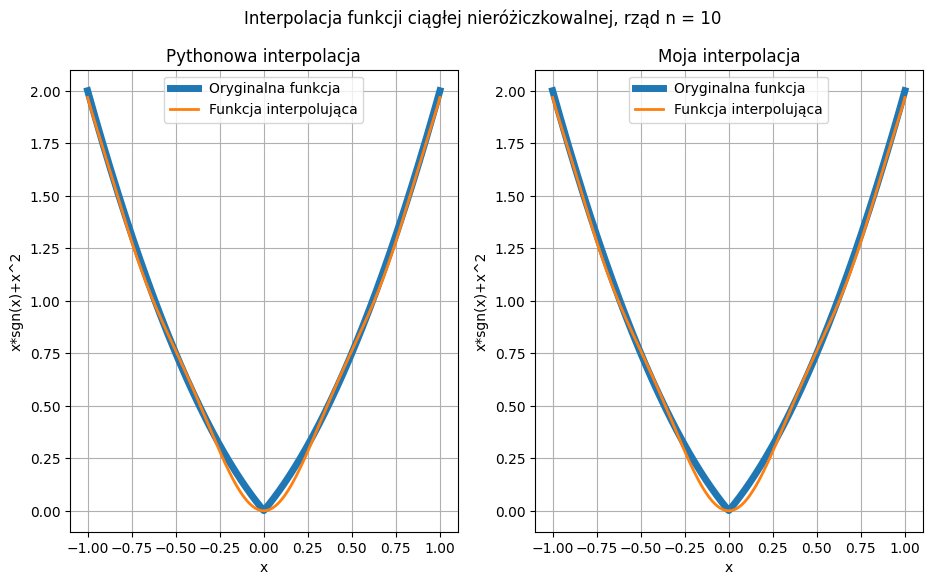

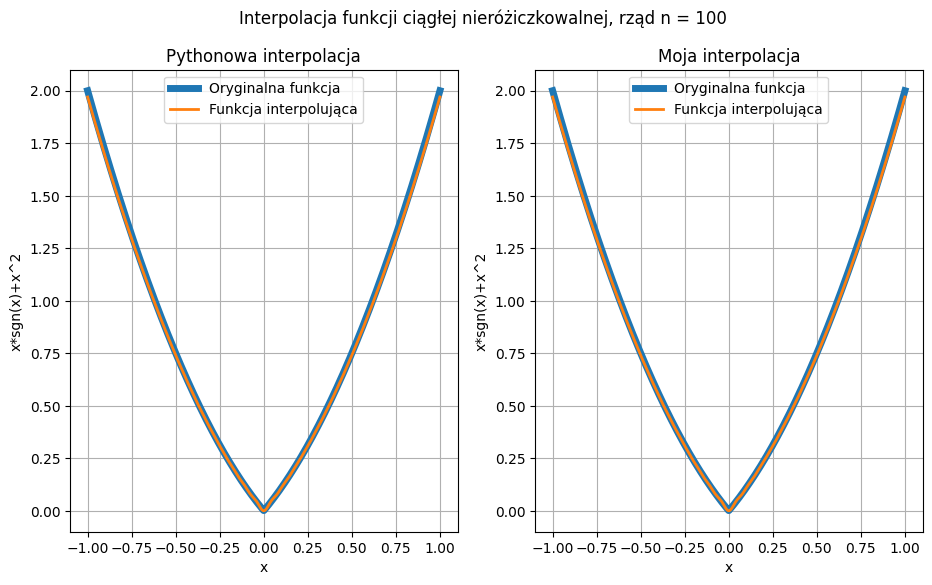

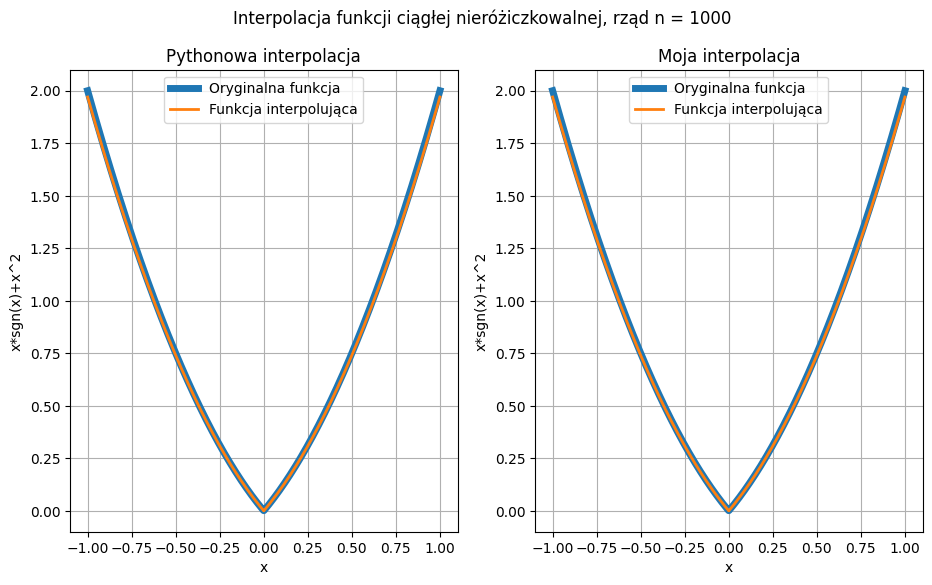

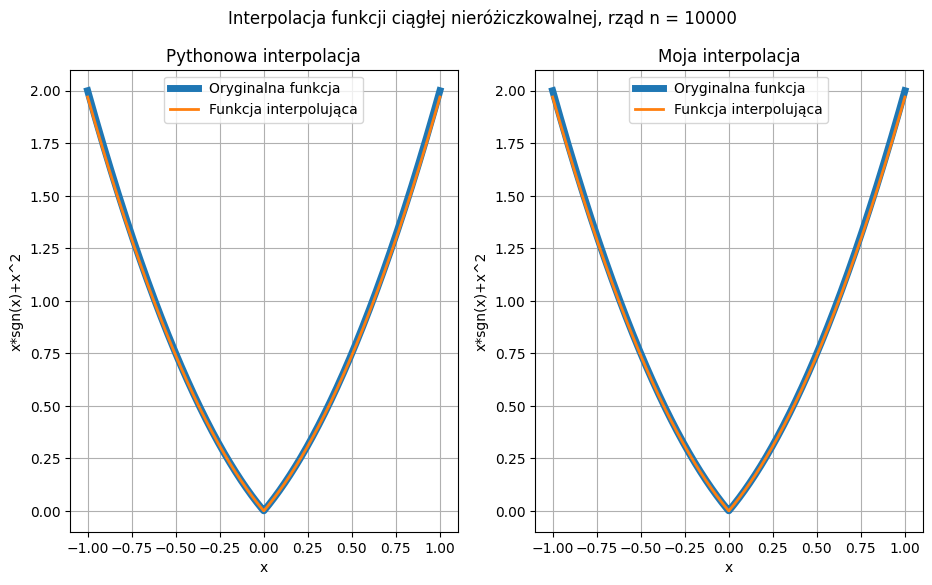

In [7]:
domain = np.linspace(-1, 1, 1000) 

for i in range(N):
    plt.figure(figsize=(11, 6))
    ax = plt.subplot(1, 2, 1)
    ax.plot(domain, f1(domain), linewidth=5, label='Oryginalna funkcja')
    ax.plot(domain, y_python[i], linewidth=2, label='Funkcja interpolująca')
    #ax.plot(x[i], y[i], 'ko', markersize=2, label='Węzły interpolacji')
    ax.set(xlabel='x', ylabel='x*sgn(x)+x^2')
    plt.grid()
    plt.title(label='Pythonowa interpolacja')
    plt.legend()
    ax = plt.subplot(1, 2, 2)
    ax.plot(domain, f1(domain), linewidth=5, label='Oryginalna funkcja')
    ax.plot(domain, y_main[i], linewidth=2, label='Funkcja interpolująca')
    #ax.plot(x[i], y[i], 'ko', markersize=2, label='Węzły interpolacji')
    ax.set(xlabel='x', ylabel='x*sgn(x)+x^2')
    plt.grid()
    plt.title(label='Moja interpolacja')
    plt.suptitle(t='Interpolacja funkcji ciągłej nieróżiczkowalnej, rząd n = '+str(10**(i+1)))
    plt.legend()
    plt.show()

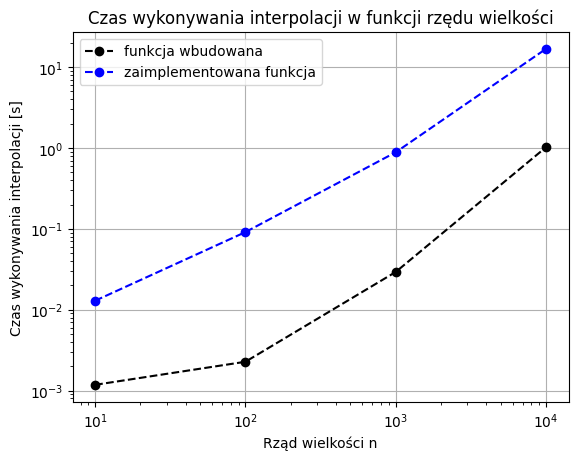

In [10]:
domain = np.logspace(1, N, N)

ax = plt.subplot()
ax.plot(domain, time_python, 'ko--', label='funkcja wbudowana')
ax.plot(domain, time_main, 'bo--', label='zaimplementowana funkcja')
ax.set(xlabel='Rząd wielkości n', ylabel='Czas wykonywania interpolacji [s]')
plt.title(label='Czas wykonywania interpolacji w funkcji rzędu wielkości')
plt.grid()
plt.legend()
plt.semilogy()
plt.semilogx()
plt.show()


Wnioski:

Obserwując powyższe wykresy można zauważyć, że już dla n=100 funkcja interpolująca dobrze przybliża oryginalną funkcję.
Z kolei zwracając uwagę na czas obliczeń widać wyraźnie, że zaimplementowana przeze mnie funkcja odbiega wydajnością od funkcji zawartej w module scipy. Analiza ostatniego wykresu nasuwa wniosek, że czas obliczeń funkcji $barycentric\_interpolate$ jest dużo mniejszy w porównaniu do czasu wykonywania mojej funkcji.

***Zadanie 2.***  
Dla funkcji jednokrotnie i trzykrotnie różniczkowalnej z [Zadania domowego 2]. Przeanalizować w pętli jakość interpolacji dla różnych rzędów interpolacji $n$. 

W tym celu należy:
- wyliczyć wartość funkcji i wielomianu interpolacyjnego w 1000 punktów (nie będącymi węzłami interpolacji np. punkty równoodległe),
- wyliczyć normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu, maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.
- dla każdej z funkcji sporządzić wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu,
- dla porównania umieścić na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).

Poniżej również posłużyłem się parametrem N, przy zmianie go na wartość obliczy on również dla rzędu n = 100 000 jednak na moim komputerze po 2 minutach od uruchomienia program nadal nie dawał wyniku.

In [11]:
N = 4 

domain = np.linspace(-1, 1, 1000)

x1 = main.chebyshev_nodes(10)
x2 = main.chebyshev_nodes(100)
x3 = main.chebyshev_nodes(1000)
x4 = main.chebyshev_nodes(10000)
x5 = main.chebyshev_nodes(100000)

x = [x1, x2, x3, x4, x5]

y1 = [] # jednokrotnie rozniczkowalna
y3 = [] # trzykrotnie rozniczkowalna

for i in range(N):
    value1 = f2(x[i])
    value3 = f3(x[i])
    y1.append(value1)
    y3.append(value3)

y1_interpolated = []
y3_interpolated = []

for i in range(N):
    y1_interpolated.append(barycentric_interpolate(x[i], y1[i], domain))
    y3_interpolated.append(barycentric_interpolate(x[i], y3[i], domain))

y1_errors = []
y3_errors = []

for i in range(N):
    y1_errors.append(main.L_inf(f2(domain), y1_interpolated[i]))
    y3_errors.append(main.L_inf(f3(domain), y3_interpolated[i]))

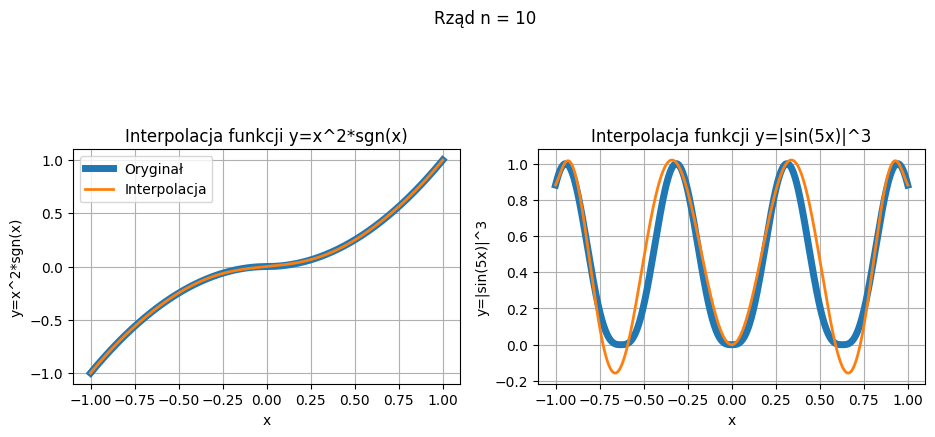

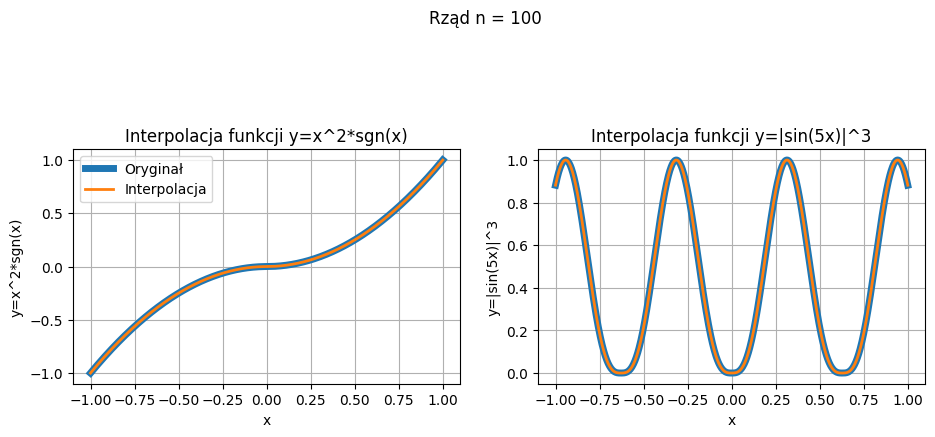

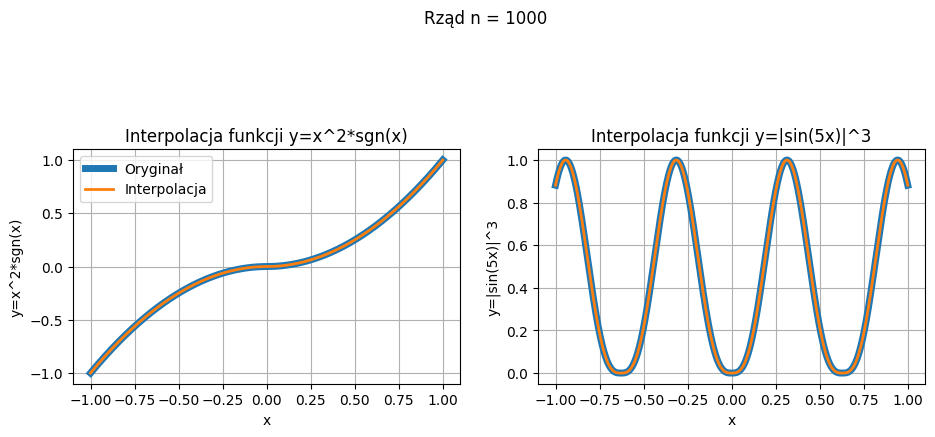

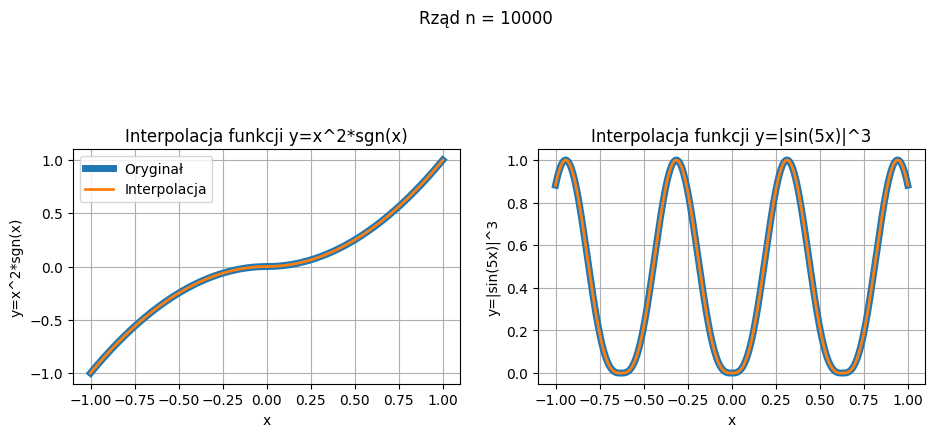

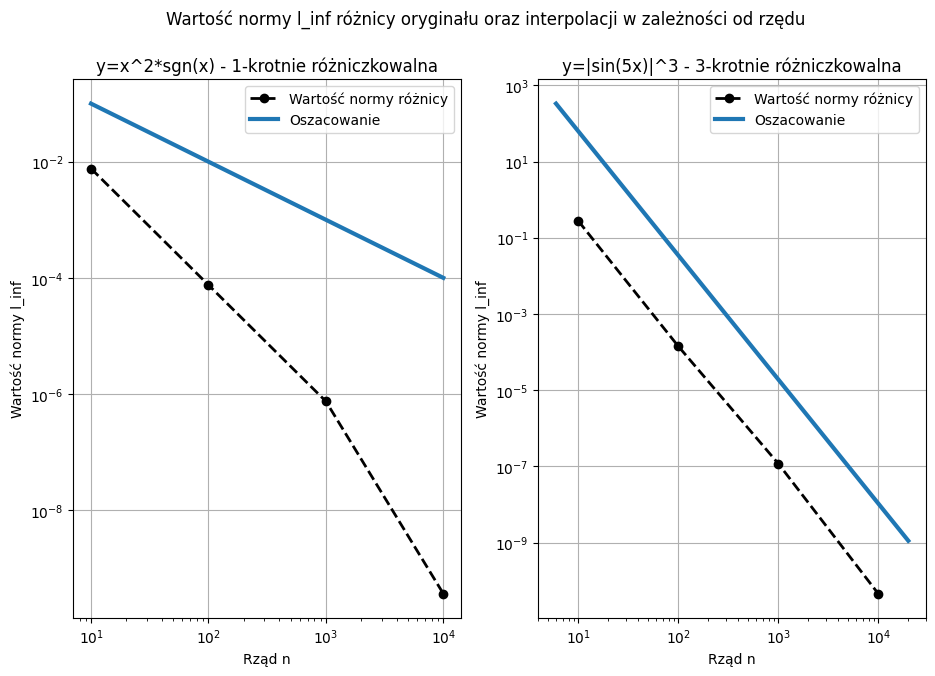

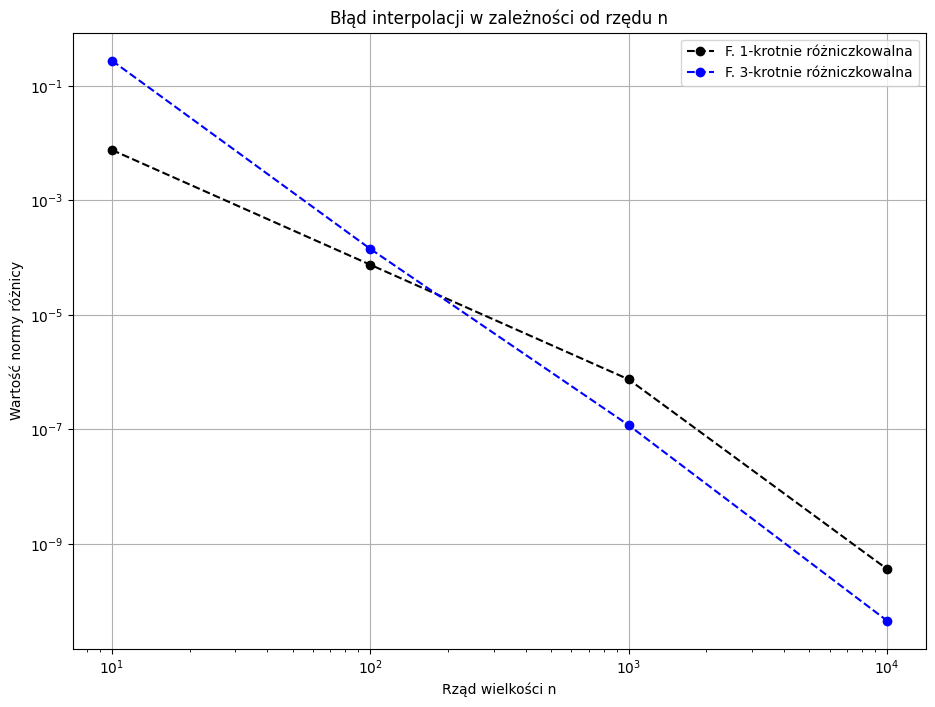

In [12]:
log_domain = np.logspace(1, N, N)

for i in range(N):
    plt.figure(figsize=(11,14))
    
    ax = plt.subplot(N, 2, 1)
    ax.plot(domain, f2(domain), linewidth=5, label='Oryginał')
    ax.plot(domain, y1_interpolated[i], linewidth=2, label='Interpolacja')
    #ax.plot(x[i], y1[i], 'ko', markersize=1, label="Węzły")
    ax.set(xlabel='x', ylabel='y=x^2*sgn(x)')
    plt.grid()
    plt.legend()
    plt.title(label='Interpolacja funkcji y=x^2*sgn(x)')

    ax = plt.subplot(N, 2, 2)
    ax.plot(domain, f3(domain), linewidth=5, label='Oryginał')
    ax.plot(domain, y3_interpolated[i], linewidth=2, label='Interpolacja')
    #ax.plot(x[i], y3[i], 'ko', markersize=1, label="Węzły")
    ax.set(xlabel='x', ylabel='y=|sin(5x)|^3')
    plt.title(label='Interpolacja funkcji y=|sin(5x)|^3')
    plt.grid()

    plt.suptitle(t='Rząd n = '+str(10**(i+1)))
    plt.show()

n_domain = np.logspace(1, N, 1000)
f_exp = lambda n, v: n**(-v)
V=2.102e4
bound = lambda n:4*V/3/np.pi/(n-3)**3

plt.figure(figsize=(11, 7))
ax = plt.subplot(1, 2, 1)
ax.plot(log_domain, y1_errors, 'ko--', linewidth=2, label='Wartość normy różnicy')
ax.plot(n_domain, f_exp(n_domain, 1), linewidth=3, label='Oszacowanie')
ax.set(xlabel='Rząd n', ylabel='Wartość normy l_inf')
plt.title(label='y=x^2*sgn(x) - 1-krotnie różniczkowalna')
plt.semilogx()
plt.semilogy()
plt.legend()
plt.grid()
ax = plt.subplot(1, 2, 2)
ax.plot(log_domain, y3_errors, 'ko--', linewidth=2, label='Wartość normy różnicy')
ax.plot([6,2e4],[bound(6),bound(2e4)], label='Oszacowanie', linewidth=3)
ax.set(xlabel='Rząd n', ylabel='Wartość normy l_inf')
plt.title(label='y=|sin(5x)|^3 - 3-krotnie różniczkowalna')
plt.grid()
plt.semilogx()
plt.legend()
plt.semilogy()
plt.suptitle(t='Wartość normy l_inf różnicy oryginału oraz interpolacji w zależności od rzędu')
plt.show()

plt.figure(figsize=(11, 8))
ax = plt.subplot()
ax.plot(log_domain, y1_errors, 'ko--', label='F. 1-krotnie różniczkowalna')
ax.plot(log_domain, y3_errors, 'bo--', label='F. 3-krotnie różniczkowalna')
ax.set(xlabel='Rząd wielkości n', ylabel='Wartość normy różnicy')
plt.grid()
plt.title(label='Błąd interpolacji w zależności od rzędu n')
plt.semilogx()
plt.semilogy()
plt.legend()
plt.show()

Wnioski:

Powyższe zadanie wymagało ode mnie zbadania jakości interpolacji w zależności od rzędu n. Analizując ostatni wykres można wywnioskować, że wraz ze wzrostem rzędu n błąd interpolacji maleje. Błąd interpolacji jest wyznaczany jako norma l_inf różnicy wartości oryginalnej funkcji oraz wartości funkcji interpolacyjnej. Dodatkowo błąd przybliżania obu funkcji mieści się w wyznaczonym przeze mnie oszacowaniu.

***Zadanie 3.***  
Dla funkcji nieciągłej z [Zadania domowego 2] przeanalizować efekt Gibbsa
oddzielnie dla parzystych i nieparzystych $n$. Oddzielnie wyliczyć jaki jest minimalny błąd niezależny od rzędu. Dlaczego wartości dla parzystych i nieparzystych $n$ się różnią?   
***Wskazówka:*** Wykonać wykres funkcji i jej funkcji interpolującej.

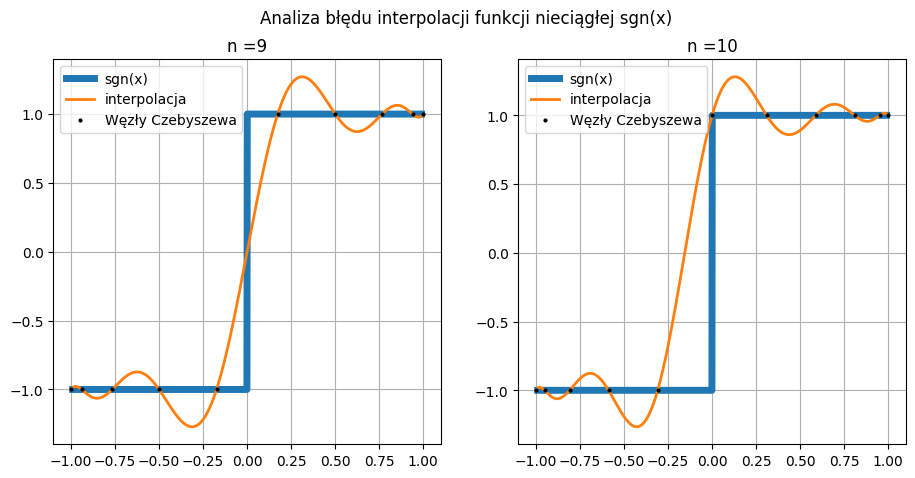

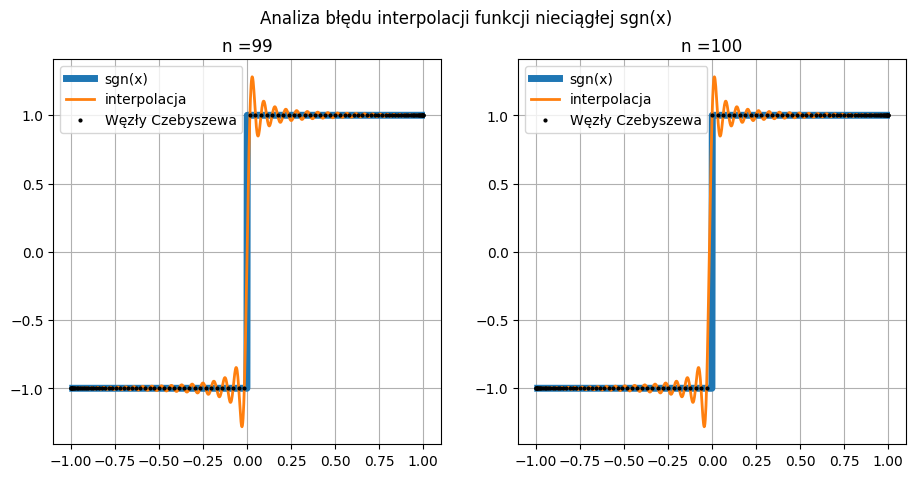

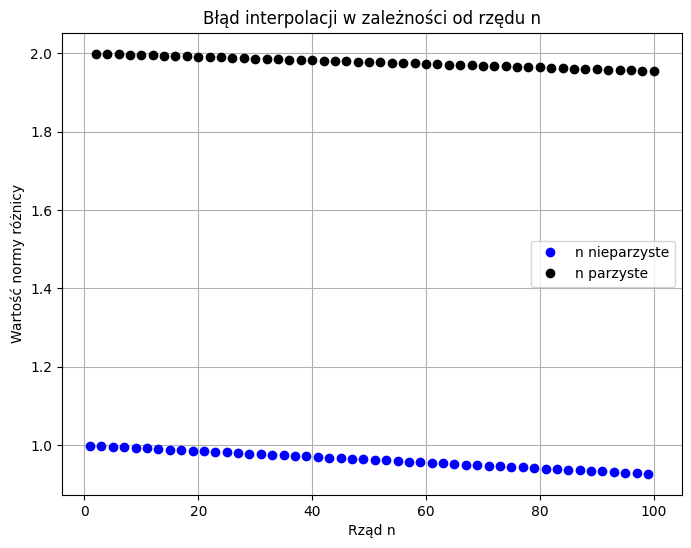

In [13]:
gibbs = f5
N = 2
rank = 101
n_odd = [9, 99]
n_even = [10, 100]
x_odd = []
x_even = []
y_odd = []
y_even = []

for i in range(N):
    x_odd.append(main.chebyshev_nodes(n_odd[i]))
    x_even.append(main.chebyshev_nodes(n_even[i]))

for i in range(N):
    y_odd.append(gibbs(x_odd[i]))
    y_even.append(gibbs(x_even[i]))

y_odd_interpolate = []
y_even_interpolate = []

domain = np.linspace(-0.99, 0.99, 1000)

for i in range(N):
    y_odd_interpolate.append(barycentric_interpolate(x_odd[i], y_odd[i], domain))
    y_even_interpolate.append(barycentric_interpolate(x_even[i], y_even[i], domain))

for i in range(N):
    plt.figure(figsize=(11,5))
    ax = plt.subplot(1, 2, 1)
    ax.plot(domain, gibbs(domain), linewidth=5, label='sgn(x)')
    ax.plot(domain, y_odd_interpolate[i], linewidth=2, label='interpolacja')
    ax.plot(x_odd[i], y_odd[i], 'ko', markersize=2, label='Węzły Czebyszewa')
    plt.grid()
    plt.legend()
    plt.title(label='n ='+str(10**(i+1)-1))

    ax = plt.subplot(1, 2, 2)
    ax.plot(domain, gibbs(domain), linewidth=5, label='sgn(x)')
    ax.plot(domain, y_even_interpolate[i], linewidth=2, label='interpolacja')
    ax.plot(x_even[i], y_even[i], 'ko', markersize=2, label='Węzły Czebyszewa')
    plt.grid()
    plt.title(label='n ='+str(10**(i+1)))
    plt.legend()
    plt.suptitle(t='Analiza błędu interpolacji funkcji nieciągłej sgn(x)')
    plt.show()

y_odd_errors = []
y_even_errors = []

for i in range(1, rank):
    nodes = main.chebyshev_nodes(i)
    values = gibbs(nodes)
    weights = main.bar_czeb_weights(i)
    if i % 2 != 0:
        y_odd_errors.append(main.L_inf(gibbs(domain), main.barycentric_inte(nodes, values, weights, domain)))
    else:
        y_even_errors.append(main.L_inf(gibbs(domain), main.barycentric_inte(nodes, values, weights, domain)))

plt.figure(figsize=(8, 6))
ax = plt.subplot()
ax.plot([2*i + 1 for i in range(0, 50)], y_odd_errors, 'bo', label='n nieparzyste')
ax.plot([i*2 for i in range(1,51)], y_even_errors, 'ko', label='n parzyste')
ax.set(xlabel='Rząd n', ylabel='Wartość normy różnicy')
plt.grid()
plt.title(label='Błąd interpolacji w zależności od rzędu n')
plt.legend()
plt.show()

Wnioski:

W ostatnim zadaniu zapoznałem się z efektem Gibbsa. Analizując powyższe wykresy możemy zauważyć, że podczas interpolacji funkcji nieciągłych zawsze spotkamy się z błędami. Dodatkowo nie jesteśmy w stanie ich wyeliminować zwiększając rząd n co potwierdza ostatni wykres, sugeruje nam również, że dla rzędów nieparzystych rzędów n błąd jest dwukrotnie mniejszy w porównaniu do parzystych rzędów. Wynika to z tego, że dla nieparzystych rzędów interpolacja będzie dokładniejsza, ponieważ generując węzły Czebyszewa za pomocą zaimplementowanej wcześniej funkcji otrzymujemy tak naprawdę n+1 węzłów czyli liczbe parzystą. Dzięki temu otrzymujemy symetryczny rozkład punktów względem punktu nieciągłości co powoduje lepsze przybliżenie funkcji. Jednak nawet znaczne zwiększenie rzędu nie spowoduje zniwelowania wsytępowania efektu Gibbsa w punkcie nieciągłości.

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)